# Implementing a perceptron learning algorithm in Python

In [1]:
import numpy as np

class Perceptron(object) : 
    def __init__(self, eta=0.01, n_iter=50, random_state=1) :
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y) :
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        print('weight initialization')
        print(self.w_)
        self.errors_ = []
    
        for _ in range(self.n_iter) : 
            errors = 0
            for xi, target in zip (X, y) : 
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                if (update != 0.0) :
                    print('xi : ' + str(xi) + ', target : ' + str(target)+ ', update : ' + str(update))
                    print('weight update')
                    print(self.w_)
                
            self.errors_.append(errors)
        return self

    def net_input(self, X) :
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X) :
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

### Reading in the Iris data

In [3]:
import pandas as pd
df = pd.read_csv('iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Plotting the Iris data

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

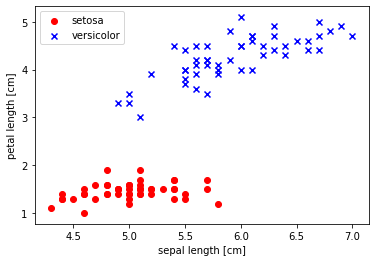

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
print(y)
y = np.where(y == 'Iris-setosa', -1, 1)
print(y)
X = df.iloc[0:100, [0,2]].values
print(X)
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

### Training the perceptron model

weight initialization
[ 0.01624345 -0.00611756 -0.00528172]
xi : [7.  4.7], target : 1, update : 0.2
weight update
[0.21624345 1.39388244 0.93471828]
xi : [5.1 1.4], target : -1, update : -0.2
weight update
[0.01624345 0.37388244 0.65471828]
xi : [4.9 1.4], target : -1, update : -0.2
weight update
[-0.18375655 -0.60611756  0.37471828]
xi : [7.  4.7], target : 1, update : 0.2
weight update
[0.01624345 0.79388244 1.31471828]
xi : [5.1 1.4], target : -1, update : -0.2
weight update
[-0.18375655 -0.22611756  1.03471828]
xi : [4.9 1.4], target : -1, update : -0.2
weight update
[-0.38375655 -1.20611756  0.75471828]
xi : [7.  4.7], target : 1, update : 0.2
weight update
[-0.18375655  0.19388244  1.69471828]
xi : [5.1 1.4], target : -1, update : -0.2
weight update
[-0.38375655 -0.82611756  1.41471828]
xi : [5.7 3.5], target : 1, update : 0.2
weight update
[-0.18375655  0.31388244  2.11471828]
xi : [5.1 1.4], target : -1, update : -0.2
weight update
[-0.38375655 -0.70611756  1.83471828]


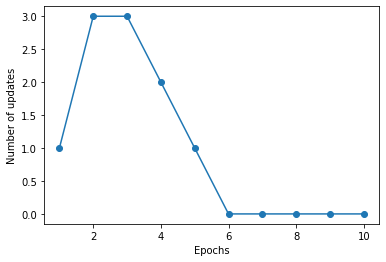

In [5]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

### A function for plotting decision regions

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02) :

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)) :
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolors='black')

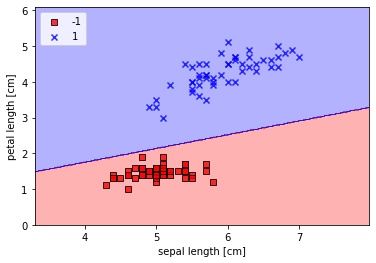

In [7]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()